<a href="https://colab.research.google.com/github/NicoAN42/SKRPSI/blob/main/Final_wo_CBAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#mount dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from tensorflow.keras.layers import Conv2D, Input, concatenate, Activation, InputLayer, Dense, Reshape, Flatten, Add, multiply, Permute, Lambda, Concatenate
from tensorflow.keras.layers import LeakyReLU,ReLU, MaxPooling2D, BatchNormalization,GlobalMaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.activations import softmax,sigmoid
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout,SpatialDropout2D,GaussianDropout
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras import backend as K
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tensorflow
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score
from sklearn.model_selection import StratifiedKFold
import os
import random
import shutil

In [17]:
#from tensorflow.keras.optimizers import SGD

In [18]:
CLASS = 3
#sourcepath isi semua data train, folder valid kosongin datanya sisai folder classnya
sourcePath = '/content/drive/MyDrive/Colab Notebooks/Dataset 090'
train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset 090/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset 090/valid'
test_path = '/content/drive/MyDrive/Colab Notebooks/Dataset 090/test'
#attention_module = 'cbam_block'
#nico

In [19]:
classLabels =['covid','normal', 'pneumonia']

In [20]:
input = Input(shape=(256,256,3))

In [21]:
#Layer 1
model = layers.Conv2D(32, (3,3), padding='same', name='conv_1', activation = 'relu')(input)
model = layers.BatchNormalization(name='norm_1')(model)
model = layers.MaxPooling2D(pool_size=(2, 2), strides= 2)(model)
#attention_module = 'cbam_block'
#y = attach_attention_module(model, attention_module)
#model =  tensorflow.keras.layers.add([model, y])


In [22]:
#Layer 2
model = layers.Conv2D(64, (3,3), padding='same', name='conv_2', activation = 'relu')(model)
model = layers.Dropout(0.1)(model)
model = layers.BatchNormalization(name='norm_2')(model)
model = layers.MaxPooling2D(pool_size=(2, 2), strides = 2)(model)

#attention_module = 'cbam_block'
#y = attach_attention_module(model, attention_module)
#model =  tensorflow.keras.layers.add([model, y])


In [23]:
# Layer 3
model = layers.Conv2D(64, (3,3), padding='same', name='conv_3', activation = 'relu')(model)
model = layers.BatchNormalization(name='norm_3')(model)
model = layers.MaxPooling2D(pool_size=(2, 2), strides = 2)(model)

#attention_module = 'cbam_block'
#y = attach_attention_module(model, attention_module)
#model =  tensorflow.keras.layers.add([model, y])



In [24]:
# Layer 4
model = layers.Conv2D(128, (3,3), padding='same', name='conv_4', activation = 'relu')(model)
model = layers.Dropout(0.2)(model)
model = layers.BatchNormalization(name='norm_4')(model)
model = layers.MaxPooling2D(pool_size=(2, 2), strides = 2)(model)

#attention_module = 'cbam_block'
#y = attach_attention_module(model, attention_module)
#model =  tensorflow.keras.layers.add([model, y])


In [25]:
# Layer 5
model = layers.Conv2D(256, (3,3), padding='same', name='conv_5', activation = 'relu')(model)
layer = layers.Conv2D(256, (3,3), padding='same', name='conv_5', activation = 'relu')
batch = layers.BatchNormalization(name='norm_5')
model = layers.Dropout(0.2)(model)
model = layers.BatchNormalization(name='norm_5')(model)
#model = layers.MaxPooling2D(pool_size=(2, 2), strides = 2)(model)

In [26]:
model = layers.Flatten()(model)
model = layers.Dense(128, activation = 'relu')(model)
model = layers.Dropout(0.2)(model)
output = layers.Dense(3,Activation('softmax'))(model)
model = Model(input, output)

In [27]:
#output = model.output_shape

In [28]:
print(input)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [29]:
#initial_learning_rate=0.0001

In [30]:
#lr_schedule = ExponentialDecay(
#   initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
#)


In [31]:
opt = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [32]:
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

In [33]:
print(model.summary())
print(model)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv_1 (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 norm_1 (BatchNormalization)  (None, 256, 256, 32)     128       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv_2 (Conv2D)             (None, 128, 128, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                             

In [34]:
X = []
Y = []
def transferBetweenFolders(source, dest, splitRate): 
    global sourceFiles
    sourceFiles=os.listdir(source)
    if(len(sourceFiles)!=0):
        transferFileNumbers=int(len(sourceFiles)*splitRate)
        transferIndex=random.sample(range(0, len(sourceFiles)), transferFileNumbers)
        for eachIndex in transferIndex:
            shutil.move(source+str(sourceFiles[eachIndex]), dest+str(sourceFiles[eachIndex]))
    else:
        print("No file moved. Source empty!")
        

In [35]:
def transferAllClassBetweenFolders(source, dest, splitRate):
    for label in classLabels:
        transferBetweenFolders(sourcePath+'/'+source+'/'+label+'/', 
                               sourcePath+'/'+dest+'/'+label+'/', 
                               splitRate)
#First cut all images from validation to train (if any exists)
transferAllClassBetweenFolders('valid', 'train', 1.0)
transferAllClassBetweenFolders('test', 'train', 1.0)
#no valid
transferAllClassBetweenFolders('train', 'test', 0.2)

In [36]:
def prepareNameWithLabels(folderName):
    sourceFiles=os.listdir(sourcePath+'/train/'+folderName)
    for val in sourceFiles:
        X.append(val)
        for i in range(len(classLabels)):
          if(folderName==classLabels[i]):
              Y.append(i)
# Organize file names and class labels in X and Y variables
for i in range(len(classLabels)):
  prepareNameWithLabels(classLabels[i])

def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='micro')
    f1Score=f1_score(y_true, y_pred, average='micro') 
    recall = recall_score(y_true, y_pred, average='micro')
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    print("Recall : {}".format(recall))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

    print("***----------------------------***")  
    return accuracy, precision, f1Score, recall

In [37]:
transferAllClassBetweenFolders('valid', 'train', 1.0)
#no valid
#transferAllClassBetweenFolders('test', 'train', 1.0)
X=np.asarray(X)
Y=np.asarray(Y)

print(X)
print(Y)

skf = StratifiedKFold(n_splits=5
                      , shuffle=True)
skf.get_n_splits(X, Y)
print(skf)
print(skf.get_n_splits(X,Y))
print(skf.split(X,Y))
foldNum=0
overAllAcc = 0
overAllPrec = 0
overAllf1 = 0
overAllRec = 0

No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
['COVID(53).png' 'COVID(35).png' 'COVID(64).png' ...
 'person260_virus_541.jpeg' 'person264_bacteria_1231.jpeg'
 'person259_bacteria_1220.jpeg']
[0 0 0 ... 2 2 2]
StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
5
<generator object _BaseKFold.split at 0x7f454a674850>


trn_indx: 1729 test_indx: 433
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
Results for fold 1
1729
433
Found 1729 images belonging to 3 classes.
Found 433 images belonging to 3 classes.
Found 540 images belonging to 3 classes.
Epoch 1/25
55/55 - 811s - loss: 0.9856 - accuracy: 0.8837 - val_loss: 0.7076 - val_accuracy: 0.8129 - 811s/epoch - 15s/step
Epoch 2/25
55/55 - 31s - loss: 0.1896 - accuracy: 0.9497 - val_loss: 0.5529 - val_accuracy: 0.7598 - 31s/epoch - 561ms/step
Epoch 3/25
55/55 - 30s - loss: 0.3780 - accuracy: 0.9410 - val_loss: 0.3247 - val_accuracy: 0.8637 - 30s/epoch - 554ms/step
Epoch 4/25
55/55 - 30s - loss: 0.2437 - accuracy: 0.9445 - val_loss: 0.1664 - val_accuracy: 0.9538 - 30s/epoch - 549ms/step
Epoch 5/25
55/55 - 30s - loss: 0.1059 - accuracy: 0.9676 - val_loss: 0.2685 - val_accuracy: 0.8938 - 30s/epoch - 545ms/step
Epoch 6/25
55/55 - 30s - loss: 0.3017 - accuracy: 0.9589 - val_loss: 17.5694 - val_accuracy: 0.7529 - 30s/epoch

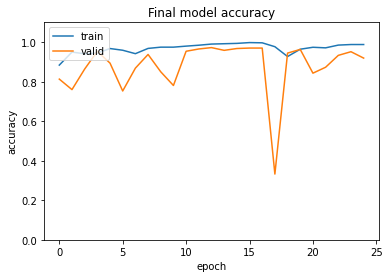

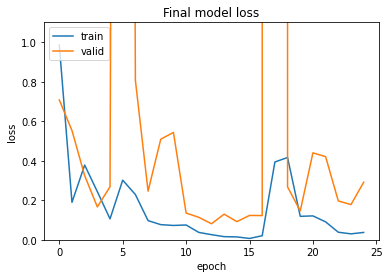

***Performance Data***
Accuracy  : 0.8777777777777778
Precision : 0.8777777777777778
f1Score : 0.8777777777777779
Recall : 0.8777777777777778
[[171   0   9]
 [  6 125  49]
 [  0   2 178]]
***----------------------------***
17/17 [==============================] - 7s 455ms/step - loss: 0.6370 - accuracy: 0.8778
***-----------------------------------------------***
Overall Accuracy:  0.8777777777777778
Overall Precision:  0.8777777777777778
Overall f1Score:  0.8777777777777779
Overall Recall:  0.8777777777777778
***------------------End of Line------------------***
trn_indx: 1729 test_indx: 433
Results for fold 2
1729
433
Found 1729 images belonging to 3 classes.
Found 433 images belonging to 3 classes.
Found 540 images belonging to 3 classes.
Epoch 1/25
55/55 - 31s - loss: 0.0776 - accuracy: 0.9786 - val_loss: 0.1108 - val_accuracy: 0.9630 - 31s/epoch - 572ms/step
Epoch 2/25
55/55 - 31s - loss: 0.0467 - accuracy: 0.9867 - val_loss: 0.1305 - val_accuracy: 0.9469 - 31s/epoch - 568ms/step


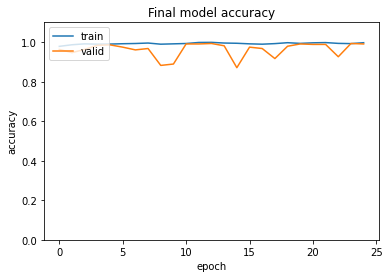

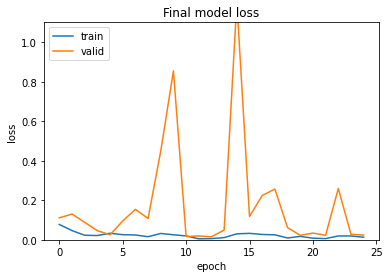

***Performance Data***
Accuracy  : 0.9574074074074074
Precision : 0.9574074074074074
f1Score : 0.9574074074074074
Recall : 0.9574074074074074
[[178   0   2]
 [  4 164  12]
 [  0   5 175]]
***----------------------------***
17/17 [==============================] - 7s 451ms/step - loss: 0.6644 - accuracy: 0.9574
***-----------------------------------------------***
Overall Accuracy:  0.9175925925925925
Overall Precision:  0.9175925925925925
Overall f1Score:  0.9175925925925926
Overall Recall:  0.9175925925925925
***------------------End of Line------------------***
trn_indx: 1730 test_indx: 432
Results for fold 3
1730
432
Found 1730 images belonging to 3 classes.
Found 432 images belonging to 3 classes.
Found 540 images belonging to 3 classes.
Epoch 1/25
55/55 - 32s - loss: 0.0301 - accuracy: 0.9931 - val_loss: 0.0309 - val_accuracy: 0.9907 - 32s/epoch - 590ms/step
Epoch 2/25
55/55 - 31s - loss: 0.0530 - accuracy: 0.9890 - val_loss: 0.6328 - val_accuracy: 0.9375 - 31s/epoch - 560ms/step


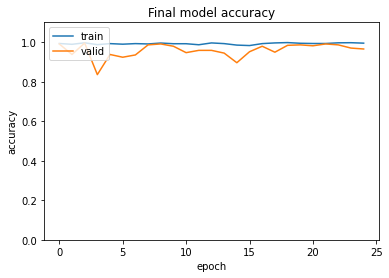

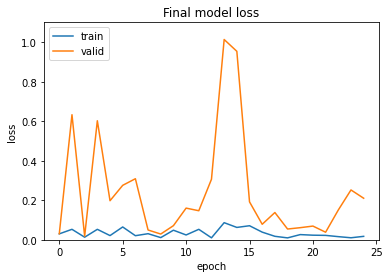

***Performance Data***
Accuracy  : 0.9351851851851852
Precision : 0.9351851851851852
f1Score : 0.9351851851851852
Recall : 0.9351851851851852
[[179   1   0]
 [  3 151  26]
 [  2   3 175]]
***----------------------------***
17/17 [==============================] - 7s 437ms/step - loss: 0.7509 - accuracy: 0.9352
***-----------------------------------------------***
Overall Accuracy:  0.9234567901234567
Overall Precision:  0.9234567901234567
Overall f1Score:  0.9234567901234568
Overall Recall:  0.9234567901234567
***------------------End of Line------------------***
trn_indx: 1730 test_indx: 432
Results for fold 4
1730
432
Found 1730 images belonging to 3 classes.
Found 432 images belonging to 3 classes.
Found 540 images belonging to 3 classes.
Epoch 1/25
55/55 - 32s - loss: 0.0442 - accuracy: 0.9890 - val_loss: 0.0374 - val_accuracy: 0.9884 - 32s/epoch - 578ms/step
Epoch 2/25
55/55 - 32s - loss: 0.0125 - accuracy: 0.9971 - val_loss: 0.0067 - val_accuracy: 0.9977 - 32s/epoch - 580ms/step


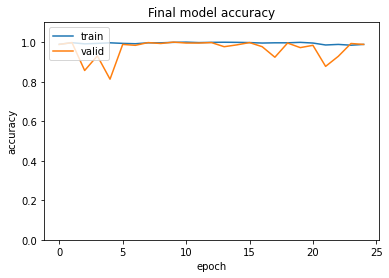

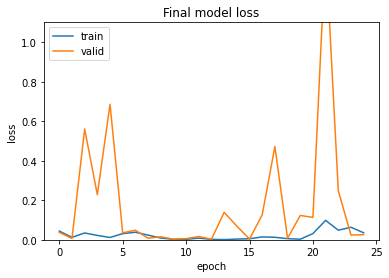

***Performance Data***
Accuracy  : 0.9703703703703703
Precision : 0.9703703703703703
f1Score : 0.9703703703703703
Recall : 0.9703703703703703
[[179   0   1]
 [  3 172   5]
 [  0   7 173]]
***----------------------------***
17/17 [==============================] - 7s 448ms/step - loss: 0.3869 - accuracy: 0.9704
***-----------------------------------------------***
Overall Accuracy:  0.9351851851851851
Overall Precision:  0.9351851851851851
Overall f1Score:  0.9351851851851852
Overall Recall:  0.9351851851851851
***------------------End of Line------------------***
trn_indx: 1730 test_indx: 432
Results for fold 5
1730
432
Found 1730 images belonging to 3 classes.
Found 432 images belonging to 3 classes.
Found 540 images belonging to 3 classes.
Epoch 1/25
55/55 - 32s - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0772 - val_accuracy: 0.9630 - 32s/epoch - 577ms/step
Epoch 2/25
55/55 - 32s - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0348 - val_accuracy: 0.9838 - 32s/epoch - 577ms/step


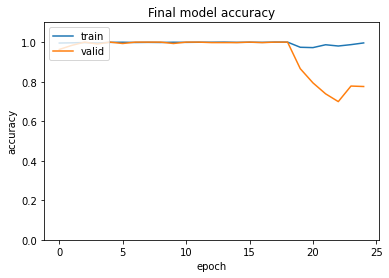

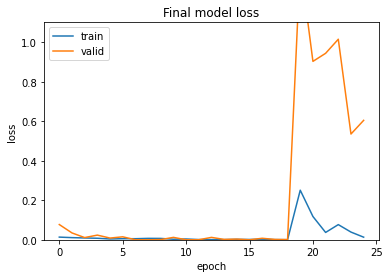

***Performance Data***
Accuracy  : 0.7611111111111111
Precision : 0.7611111111111111
f1Score : 0.7611111111111111
Recall : 0.7611111111111111
[[178   0   2]
 [ 16  57 107]
 [  4   0 176]]
***----------------------------***
17/17 [==============================] - 7s 455ms/step - loss: 1.2807 - accuracy: 0.7611
***-----------------------------------------------***
Overall Accuracy:  0.9003703703703703
Overall Precision:  0.9003703703703703
Overall f1Score:  0.9003703703703703
Overall Recall:  0.9003703703703703
***------------------End of Line------------------***


In [38]:
for train_index, val_index in skf.split(X, Y):
    print("trn_indx: %s test_indx: %s" % (len(train_index), len(val_index)))
    #First cut all images from validation to train (if any exists)
    transferAllClassBetweenFolders('valid', 'train', 1.0)
    #no valid
    #transferAllClassBetweenFolders('test', 'train', 1.0)
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    print(len(X_train))
    print(len(X_val))
    # Move validation images of this fold from train folder to the validation folder
    for eachIndex in range(len(X_val)):
        classLabel=''
        for i in range(len(classLabels)):
          if(Y_val[eachIndex]==i):
              classLabel=classLabels[i]
        #Then, copy the validation images to the validation folder
        shutil.move(sourcePath+'/train/'+classLabel+'/'+X_val[eachIndex], 
                    sourcePath+'/valid/'+classLabel+'/'+X_val[eachIndex])
        #without valid
                    #sourcePath+'/test/'+classLabel+'/'+X_val[eachIndex])
        
    train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32, shuffle=True)
    #without valid
    valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32, shuffle=True)
    test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32, shuffle=False)

    history = model.fit(train_batches, 
                    #steps_per_epoch=sp_epoch, 
                    #without valid
                    validation_data=valid_batches, 
                    #validation_steps=10, 
                    epochs=25, 
                    verbose=2)
    
    
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Final model accuracy')
    plt.ylim(0,1.1)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    #without valid
    #plt.legend(['train'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Final model loss')
    plt.ylim(0,1.1)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    #without valid
    #plt.legend(['train'], loc='upper left')
    plt.show()
    test_batches.reset()
    Y_pred = model.predict(test_batches)
    classes = test_batches.classes[test_batches.index_array]
    y_pred = np.argmax(Y_pred, axis=-1)
    #print("***Performance on Test Data***")  
    #print(sum(y_pred==classes)/10000)
    confusion_matrix(test_batches.classes[test_batches.index_array],y_pred)
    #predictions = model.predict(test_batches, verbose=1)
    #yPredictions = np.argmax(predictions, axis=1)
    #print(yPredictions)
    #true_classes = test_batches.classes
    # evaluate validation performance
    print("***Performance Data***")    
    #valAcc, valPrec, valFScore = my_metrics(true_classes, yPredictions)
    valAcc, valPrec, valFScore, valRec = my_metrics(classes, y_pred)
    overAllAcc = overAllAcc+valAcc
    overAllPrec = overAllPrec+valPrec
    overAllf1 = overAllf1+valFScore
    overAllRec = overAllRec+valRec
    
    model.evaluate(test_batches)
    print("***-----------------------------------------------***")  
    print("Overall Accuracy: ",  overAllAcc/foldNum)
    print("Overall Precision: ",  overAllPrec/foldNum)
    print("Overall f1Score: ",  overAllf1/foldNum)
    print("Overall Recall: ",  overAllRec/foldNum)

    print("***------------------End of Line------------------***")    